# Détecteur des masques
Jérémy Le Joncour, Julien Furiga

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

## Création de la liste d'apprentissage

In [129]:
from os import path, name

data_direction = "C:/Users/utilisateur/Documents/microsoft_ia/microsoft_ia/Masques/Dataset_masks/train"
categories = ["without_mask","with_mask"]

for category in categories:
    path = os.path.join(data_direction, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))

In [130]:
print(img_array.shape)

(1390, 870, 3)


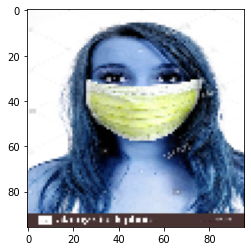

In [3]:
IMG_SIZE = 96

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap ='gray')
plt.show()

In [4]:
train_list = []

def create_train_list():
    for category in categories:
        path = os.path.join(data_direction, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            train_list.append([new_array, class_num])
       
    
create_train_list()

In [5]:
import random

random.shuffle(train_list)

In [6]:
x_app = []
y_app = []

In [7]:
for features, label in train_list:
    x_app.append(features)
    y_app.append(label)
    
x_app = np.array(x_app).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

## Création de la liste de test

In [89]:
data_direction = "C:/Users/utilisateur/Documents/microsoft_ia/microsoft_ia/Masques/Dataset_masks/test"
categories = ["without_mask","with_mask"]

for category in categories:
    path = os.path.join(data_direction, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))

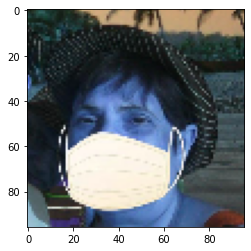

In [90]:
IMG_SIZE = 96

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap ='gray')
plt.show()

In [94]:
test_list = []

def create_test_list():
    for category in categories:
        path = os.path.join(data_direction, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            test_list.append([new_array, class_num])

            
create_test_list()

In [96]:
random.shuffle(test_list)

In [97]:
x_test = []
y_test = []

In [98]:
for features, label in test_list:
    x_test.append(features)
    y_test.append(label)
    
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

## CNN

In [36]:
import tensorflow as tf

x_app = x_app.astype('float')/255
x_test = x_test.astype('float')/255

y_app = np.array(y_app)
y_test = np.array(y_test)

In [15]:
model = tf.keras.Sequential()

# Première couche
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation ='relu', input_shape = (96, 96, 3)))
model.add(tf.keras.layers.Conv2D(64, kernel_size = (3, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Deuxième couche
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation ='relu'))
model.add(tf.keras.layers.Conv2D(64, kernel_size = (3, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Dernière couche
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer ='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

Ce modèle contient 3 couches avec une activation par défaut reLu sur les deux premières et une activation sigmoid sur la dernière couche. La fonction loss *binary_crossentropy* a été choisie par défaut, et utiliser pour les problèmes de classification binaire où les valeurs cibles sont dans l'ensemble [0, 1] (without_mask, with_mask).

Pour un soucis d'optimisation, le modèle initial possédait un input_shape [96, 96, 1] car il traitait des images en nuance de gris `-1, 96, 96, 1`. Nous sommes passés à un modèle traitant des images en RGB `-1, 96, 96, 3`, qui faciliterait la detection du masque lors de l'implémentation du modèle sur des traitements vidéo.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 42, 42, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0

In [17]:
model.fit(x_app, y_app, epochs=20)

Epoch 1/20
42/42 [==============================] - 145s 3s/step - loss: 1.8925 - accuracy: 0.5336
Epoch 2/20
42/42 [==============================] - 135s 3s/step - loss: 0.2128 - accuracy: 0.9334
Epoch 3/20
42/42 [==============================] - 137s 3s/step - loss: 0.1307 - accuracy: 0.9520
Epoch 4/20
42/42 [==============================] - 135s 3s/step - loss: 0.2277 - accuracy: 0.9058
Epoch 5/20
42/42 [==============================] - 135s 3s/step - loss: 0.0997 - accuracy: 0.9701
Epoch 6/20
42/42 [==============================] - 134s 3s/step - loss: 0.1103 - accuracy: 0.9578
Epoch 7/20
42/42 [==============================] - 133s 3s/step - loss: 0.1360 - accuracy: 0.9497
Epoch 8/20
42/42 [==============================] - 267s 6s/step - loss: 0.0935 - accuracy: 0.9759
Epoch 9/20
42/42 [==============================] - 287s 7s/step - loss: 0.0738 - accuracy: 0.9786
Epoch 10/20
42/42 [==============================] - 268s 6s/step - loss: 0.0895 - accuracy: 0.9675
Epoch 11/

In [104]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f'loss :\t{val_loss}')
print(f'acc :\t{val_acc}')

7/7 [==============================] - 6s 814ms/step - loss: 0.1914 - accuracy: 0.9692
loss :	0.19139912724494934
acc :	0.9692307710647583


Après vérification en vidéo, le modèle ne serait pas en surapprentissage.

In [105]:
y_pred = model.predict_classes(x_test)

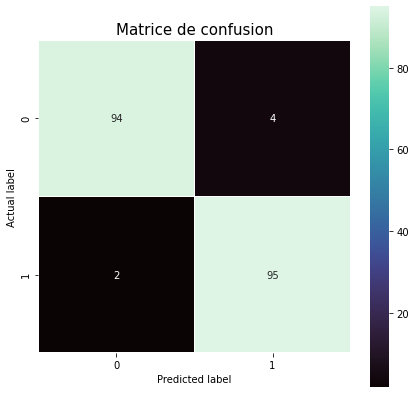

In [106]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

c_m = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(c_m, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'mako');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Matrice de confusion", size = 15)
plt.show()

Notre modèle classe correctement 189 images de notre dataset test (94 pour la classe sans masque = 0 ; 95 pour la classe avec masque = 1). Seul 6 images ne sont pas définies correctement par notre modèle (4 images sans masque sont considérés comme représentant des personnes avec des masques, et inversement, 2 images représentant des gens avec masques sont considérés sans masque).

In [107]:
#model.save("model_3")

INFO:tensorflow:Assets written to: model_3\assets


### Test sur de nouvelles images

Sans Masque !


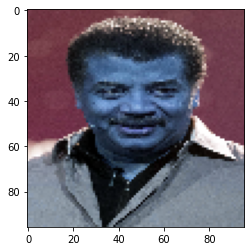

In [126]:
img = cv2.imread("dataset_masks/new_test/neil.jpg")

img = cv2.resize(img,(96,96))
img2 = img.reshape(-1,96,96,3)

y_pred = model.predict(img2)

plt.imshow(img)
if y_pred == 1:
    print('Masque')
else:
    print('Sans Masque !')

Masque


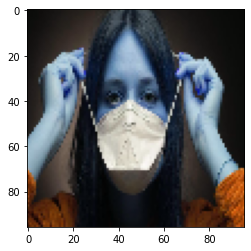

In [127]:
img = cv2.imread("dataset_masks/new_test/mask.jpg")

img = cv2.resize(img,(96,96))
img2 = img.reshape(-1,96,96,3)

y_pred= model.predict(img2)

plt.imshow(img)
if y_pred == 1:
    print('Masque')
else:
    print('Sans Masque !')

Masque


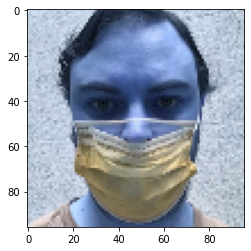

In [128]:
img = cv2.imread("dataset_masks/new_test/mask_nose.jpg")

img = cv2.resize(img,(96,96))
img2 = img.reshape(-1,96,96,3)

y_pred= model.predict(img2)

plt.imshow(img)
if y_pred == 1:
    print('Masque')
else:
    print('Sans Masque !')